In [1]:
from definiciones import criterio_equilibrio, gini_barrio, satisfechos_en
from numpy.random import default_rng as random_number_generator
from tp.schelling import mercado_inmobiliario
from tp.util.barrios import Mapa
from tp.util import simulador
import numpy as np
from matplotlib import pyplot as plt


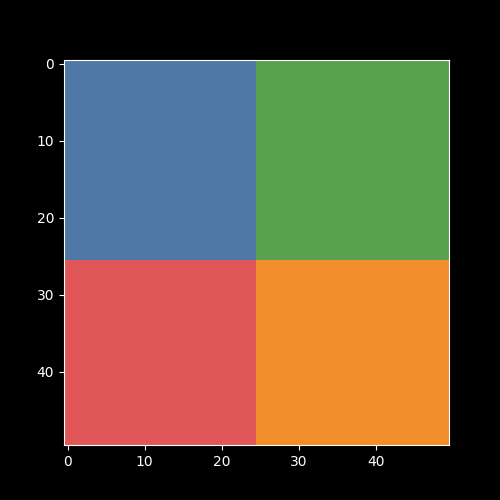

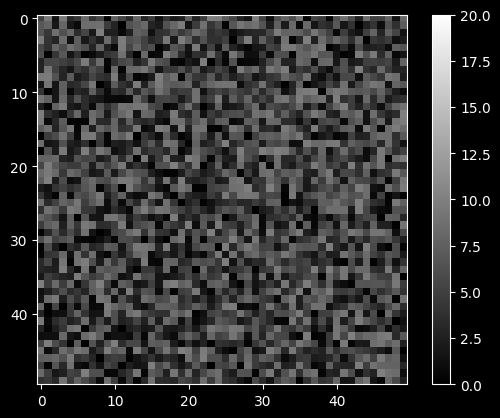

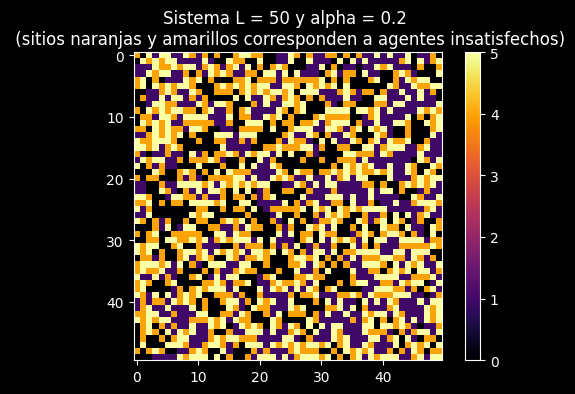

La simulación alcanzó el equilibrio en 74 pasos.


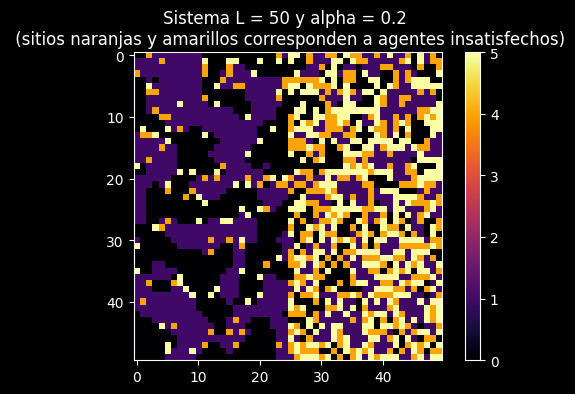

In [2]:
rng = random_number_generator(seed=1)
m = Mapa.load(mapa='./tp/mapas/cuatro_cuadrantes.txt',  barrios='./tp/barrios.json')
m.as_image();
m.show()


N = 50
start_max = 10
range_max = start_max * 2
config_inicial = rng.uniform(0, start_max, (N, N))
plt.imshow(config_inicial, cmap='grey', norm=plt.Normalize(0, range_max))
plt.colorbar()

modelo = mercado_inmobiliario(
    L=N, 
    alpha=.2,
    rng=rng, 
    mapa = m,
    rango_de_vision=1,
    capital_inicial=config_inicial,
)

caching_actions = (
    mercado_inmobiliario.utilidad_media,
    mercado_inmobiliario.capital_medio,
    gini_barrio(0),
    gini_barrio(1),
    gini_barrio(2),
    gini_barrio(3),
    satisfechos_en(0),
    satisfechos_en(1),
    satisfechos_en(2),
    satisfechos_en(3),
)

sim = simulador(modelo, criterio_equilibrio, max_steps=150, lag=20, tol=1e-3, cache_actions=caching_actions)
modelo.lattice_plot()
sim.run()
modelo.lattice_plot()

In [3]:
plt.ion()

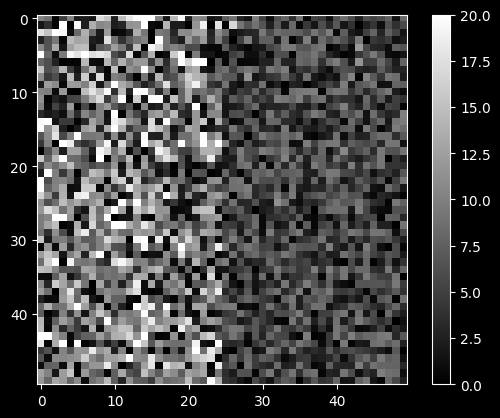

In [4]:
plt.imshow(modelo.K, cmap='grey', norm=plt.Normalize(0, range_max))
plt.colorbar()
plt.show()

In [5]:
plt.style.use('ggplot')

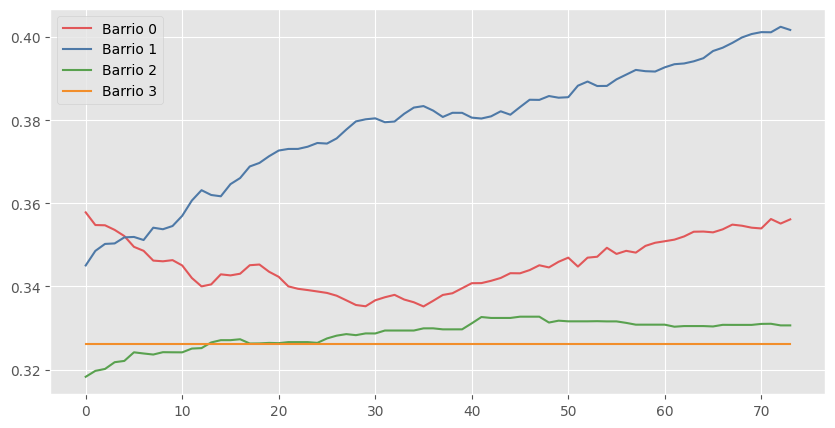

In [6]:
fig = plt.figure(figsize=(10, 5))
for i in range(4):
    plt.plot(sim._cache[f'gini_barrio_{i}'], label=f'Barrio {i}', color=m.barrios[i].color)

legend = plt.legend()
for t in legend.get_texts():
    t.set_color('black')

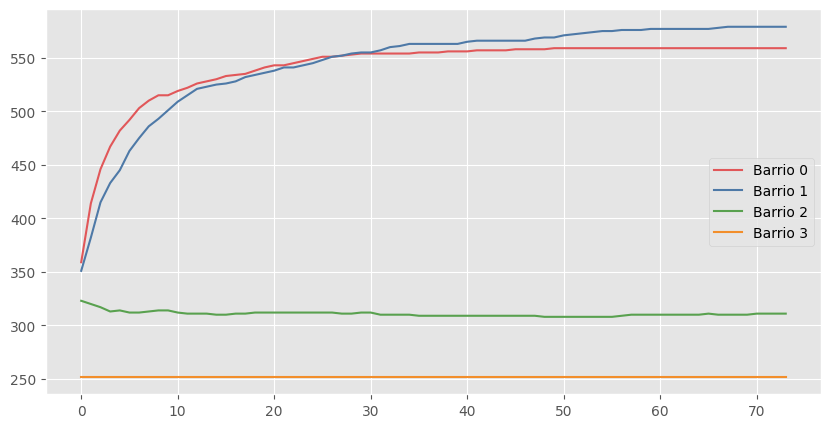

In [7]:
fig = plt.figure(figsize=(10, 5))
for i in range(4):
    plt.plot(sim._cache[f'satisfechos_en_{i}'], label=f'Barrio {i}', color=m.barrios[i].color)

legend = plt.legend()
for t in legend.get_texts():
    t.set_color('black')